In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

batch_size = 128
epochs = 10
num_classes = 10

num_predictions = 20

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
aaa = np.mean(x_train, axis=0)
print(aaa.shape)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


In [9]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4), input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.4))
model.add([layers.MaxPooling2D(pool_size=(2, 2)), layers.Dropout(0.4)])
model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
# opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

TypeError: The added layer must be an instance of class Layer. Found: [<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002D32E87E668>, <tensorflow.python.keras.layers.core.Dropout object at 0x000002D32E8890F0>]

In [7]:
data_augmentation = True
epochs = 25
batch_size = 64
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False,
                                 featurewise_std_normalization=False,
                                 samplewise_std_normalization=False,
                                 zca_whitening=False,
                                 rotation_range=15,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False)
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))


Using real-time data augmentation.
Epoch 1/25
782/782 [==============================] - 66s 84ms/step - loss: 1.9315 - accuracy: 0.4299 - val_loss: 2.5175 - val_accuracy: 0.3733
Epoch 2/25
782/782 [==============================] - 67s 86ms/step - loss: 1.3865 - accuracy: 0.5873 - val_loss: 2.1754 - val_accuracy: 0.4535
Epoch 3/25
782/782 [==============================] - 67s 85ms/step - loss: 1.2783 - accuracy: 0.6350 - val_loss: 1.1102 - val_accuracy: 0.6682
Epoch 4/25
782/782 [==============================] - 70s 89ms/step - loss: 1.1479 - accuracy: 0.6749 - val_loss: 1.2025 - val_accuracy: 0.6807
Epoch 5/25
782/782 [==============================] - 65s 84ms/step - loss: 1.1050 - accuracy: 0.6963 - val_loss: 0.8026 - val_accuracy: 0.7598
Epoch 6/25
782/782 [==============================] - 69s 89ms/step - loss: 1.0449 - accuracy: 0.7172 - val_loss: 0.9438 - val_accuracy: 0.7462
Epoch 7/25
782/782 [==============================] - 72s 92ms/step - loss: 1.0215 - accuracy: 0.7290

In [38]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\stefa\Documents\Projects\classifier_practice\saved_models\keras_cifar10_trained_model.h5 


In [9]:
def plot_image(prediction_array, true_label, image):
    prediction = classes[np.argmax(prediction_array)]
    true_value = classes[np.argmax(true_label)]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image)
    if prediction == true_value:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(str(prediction),
                                100*np.max(prediction_array),
                                str(true_value)),
                                color=color)

def plot_value_array(prediction_array, true_label):
    prediction = classes[np.argmax(prediction_array)]
    true_value = classes[np.argmax(true_label)]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

0.8057
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


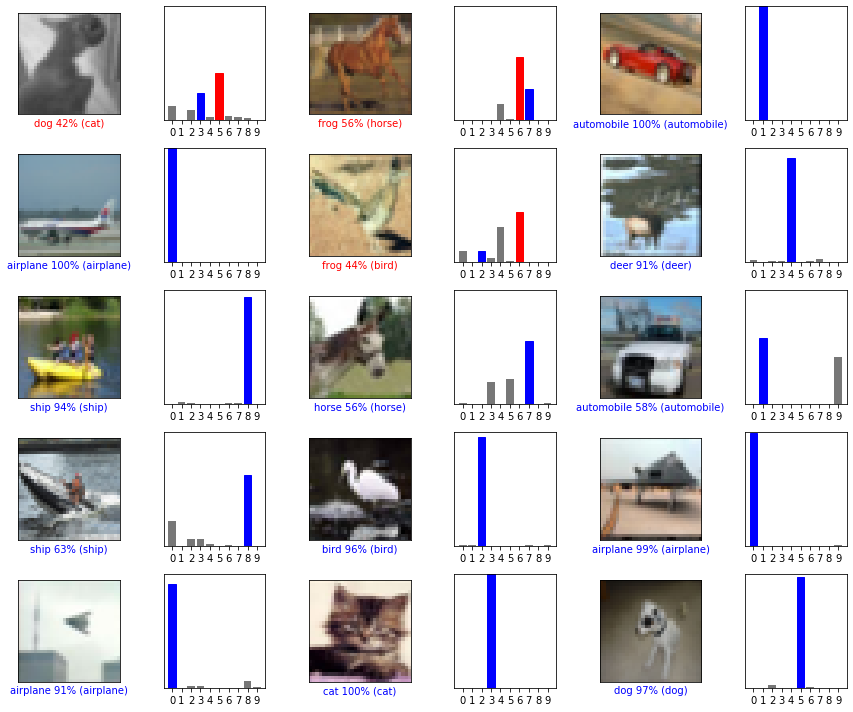

In [12]:
# %matplotlib html
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores[1])

predictions = model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
print(classes)
random_index = np.random.randint(0, high=len(x_test)-1, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[random_index[i]], y_test[random_index[i]], x_test[random_index[i]])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[random_index[i]], y_test[random_index[i]])
plt.tight_layout()
plt.show()

In [33]:
len(x_test)

10000

In [4]:
prob = 0.3

model = keras.Sequential()
# Conv1
model.add(layers.Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

# Conv2
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(512, (3, 3), padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(prob))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(prob))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(prob))
model.add(layers.BatchNormalization())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(prob))
# model.add(layers.BatchNormalization())

model.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
2.0934134


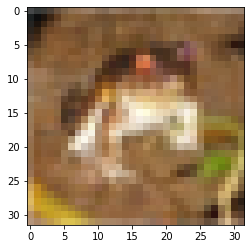

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train_ = x_train
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
print(np.max(x_train))

plt.imshow((x_train[0]+2.1)/4.2)

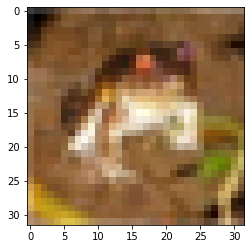

In [11]:
plt.imshow(x_train_[0])

In [7]:
a = [1, 2, 3]
b = np.expand_dims(a, 0)
print(b)
print(aaa.shape)

[[1 2 3]]
(50000, 3)
